In [9]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [10]:
df=pd.read_csv("TDHospital/TD_HOSPITAL_TRAIN.csv")

In [11]:
df.head()

,timeknown,cost,reflex,sex,blood,bloodchem1,bloodchem2,temperature,race,heart,psych1,glucose,psych2,dose,psych3,bp,bloodchem3,confidence,bloodchem4,comorbidity,totalcost,breathing,age,sleep,dnr,bloodchem5,pdeath,meals,pain,primary,psych4,disability,administratorcost,urine,diabetes,income,extraprimary,bloodchem6,education,psych5,psych6,information,cancer,death
0,4.0,3008.38867,11.228005,male,20.699219,2.199707,1.299805,35.59375,white,103.0,4.0,157.0,2.0,5,0.0,107.0,0.399963,4.403557,12.0,6.0,2471.7988,34.0,76.56396,7.519531,dnr before sadm,7.359375,NaN,142.0,2.0,Cirrhosis,NaN,<2 mo. follow-up,3525.0,5360.0,0.0,$11-$25k,COPD/CHF/Cirrhosis,167.5000,20.0,30.0,2.000,0.0,no,1.0
1,467.0,23585.89060,9.714861,M,9.398438,NaN,0.699951,39.00000,white,50.0,3.0,271.0,1.0,5,0.0,105.0,NaN,20.260360,10.0,1.0,20651.7812,26.0,63.33499,7.479492,no dnr,7.509766,NaN,132.0,3.0,Colon Cancer,0.0,NaN,43200.0,2570.0,0.0,>$50k,Cancer,480.0000,16.0,11.5,1.000,10.0,metastatic,1.0
2,533.0,4046.45898,11.353296,Male,19.296875,NaN,1.599854,38.19531,white,50.0,3.0,117.0,0.0,5,0.0,73.0,NaN,10.153806,28.0,3.0,4113.6797,13.0,70.52698,NaN,no dnr,7.459961,NaN,131.0,1.0,ARF/MOSF w/Sepsis,1.0,no(M2 and SIP pres),5894.0,1690.0,1.0,under $11k,ARF/MOSF,177.1250,5.0,18.0,0.000,5.0,yes,0.0
3,68.0,NaN,9.269058,female,7.500000,2.500000,0.599976,37.59375,white,80.0,4.0,NaN,NaN,5,0.0,120.0,3.699707,26.700676,NaN,1.0,9094.3281,18.0,55.31799,7.379883,no dnr,NaN,NaN,121.0,1.0,Cirrhosis,2.0,NaN,16717.0,NaN,0.0,$11-$25k,COPD/CHF/Cirrhosis,NaN,12.0,7.0,1.839,12.0,no,1.0
4,1605.0,6457.70703,8.655387,female,15.099609,4.399414,0.699951,35.69531,white,114.0,4.0,NaN,6.0,5,0.0,130.0,0.399963,9.962359,NaN,2.0,7150.9766,28.0,67.06598,7.429688,no dnr,7.449219,NaN,133.0,4.0,COPD,5.0,no(M2 and SIP pres),10151.0,NaN,0.0,under $11k,COPD/CHF/Cirrhosis,233.3125,2.0,7.0,6.000,12.0,no,0.0


In [12]:
df.isnull().sum()

timeknown               0
cost                 2705
reflex                  0
sex                     0
blood                 161
bloodchem1           2591
bloodchem2             44
temperature             0
race                   32
heart                   0
psych1                  0
glucose              3525
psych2               2245
dose                    0
psych3                  0
bp                      0
bloodchem3           2012
confidence            166
bloodchem4           3403
comorbidity             0
totalcost             687
breathing               0
age                     0
sleep                1792
dnr                    26
bloodchem5           1749
pdeath               7058
meals                   0
pain                    0
primary                 0
psych4               4334
disability           1102
administratorcost     139
urine                3794
diabetes                0
income               2275
extraprimary            0
bloodchem6           1793
education   

In [13]:
#droping cols which contains large number of missing values 
drop_cols=['cost','bloodchem1','glucose','psych2','bloodchem3','bloodchem4','sleep','bloodchem5','pdeath','psych3','psych4','disability','urine','bloodchem6','dose']
df.drop(columns=drop_cols, inplace=True)

In [14]:
numeric_columns = ['timeknown','reflex','blood','bloodchem2','temperature','heart','psych1','bp','confidence','comorbidity','totalcost','breathing','age','meals','pain','administratorcost','psych5','psych6','information','education']
categorical_columns = ['sex','race','dnr','cancer','extraprimary','diabetes','primary','income']

In [15]:
def mean_value(col):
    return df[col].mean()

In [16]:
fill_dict = {}
for col in numeric_columns:
    fill_dict[col] = mean_value(col)
for col in categorical_columns:
    fill_dict[col] = df[col].value_counts().index[0]

In [17]:
for col in numeric_columns+categorical_columns:
    df[col].fillna(value=fill_dict[col],inplace=True)

In [18]:
df.drop_duplicates(inplace=True)

In [19]:
df['sex'] = df['sex'].replace({'male': 1,'M': 1, '1': 1,'Male':1, 'female': 0})
df['race'] = df['race'].replace({'white': '1','black': '0','hispanic':'2','other':'4','asian':'3'})
df['cancer'] = df['cancer'].replace({'yes': '1','no': '0','metastatic':'2'})
df['dnr'] = df['dnr'].replace({'dnr before sadm': '0','no dnr': '1','dnr after sadm':'2'})
df['primary'] = df['primary'].replace({'Cirrhosis': '0','Colon Cancer': '1','ARF/MOSF w/Sepsis':'2', 'COPD':'3','Lung Cancer':'4','MOSF w/Malig':'5', 'CHF':'6','Coma':'7'})
df['extraprimary'] = df['extraprimary'].replace({'COPD/CHF/Cirrhosis': '0','Cancer': '1','ARF/MOSF':'2','Coma':'3'})
df['income'] = df['income'].replace({'under $11k':0,'$11-$25k':1,'$25-$50k':2,'>$50k':3})

In [20]:
numeric_data = df[numeric_columns].copy()

In [21]:
cat_data = df[categorical_columns].copy()

In [22]:
numeric_data.shape

(7032, 20)

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

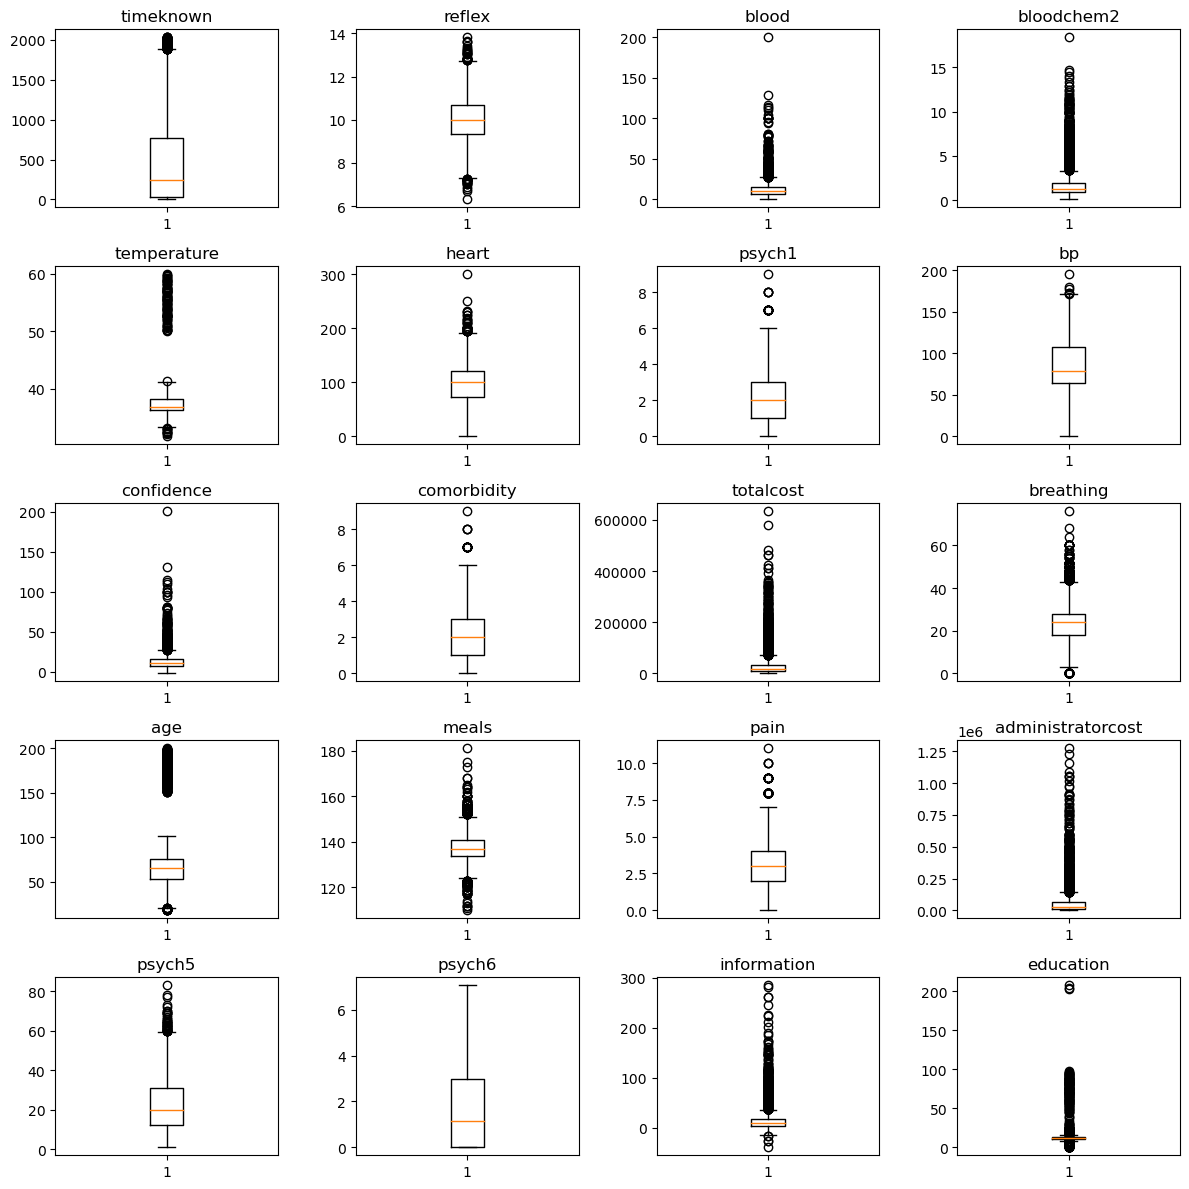

In [28]:
# check if quantitative variables have outliers.
fig, axes = plt.subplots(5, 4, figsize=(12, 12))

for i in range(5):
    for j in range(4):
        n = i*4 + j + 1
        axes[i, j].boxplot(df[numeric_columns[n-1]])
        axes[i, j].set_title(numeric_columns[n-1])
plt.tight_layout()
plt.show()

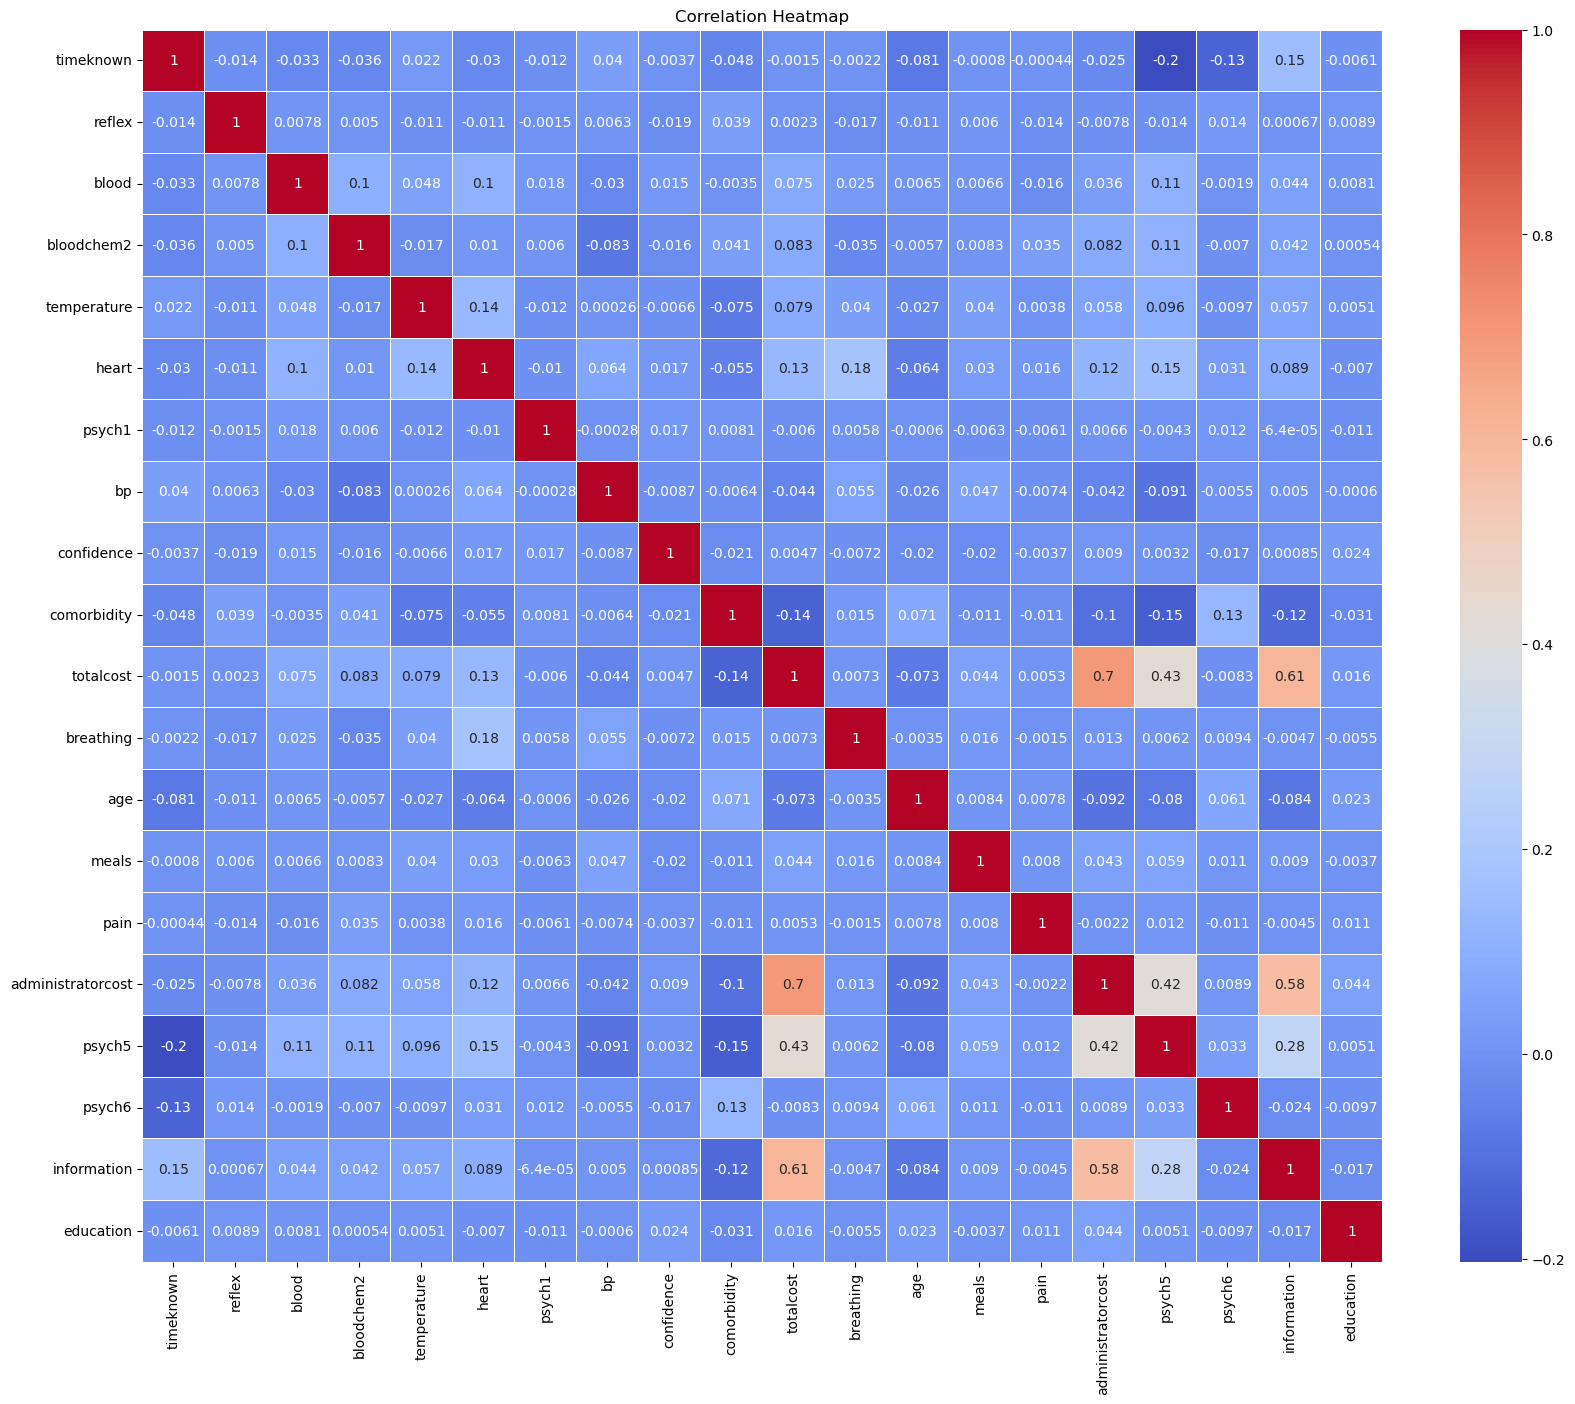

In [31]:
correlation_matrix = df[numeric_columns].corr()
plt.figure(figsize=(20,16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

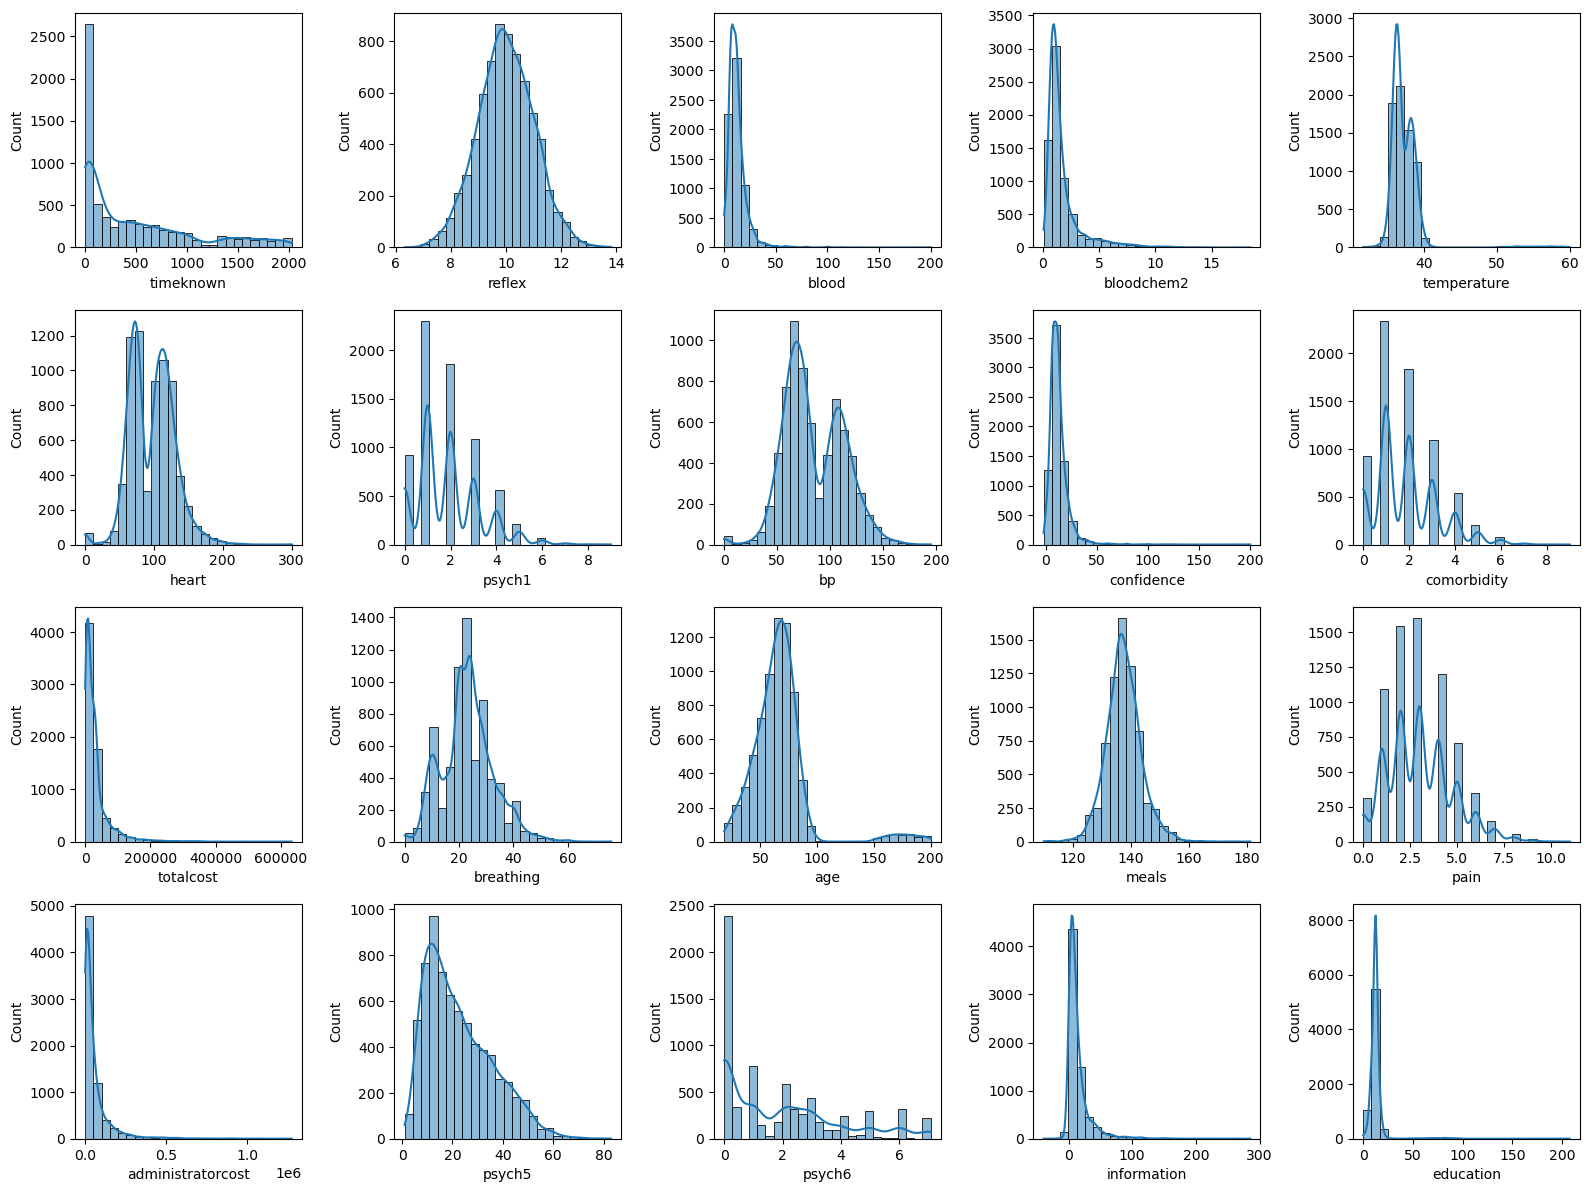

In [33]:
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(16, 12))
for i, column in enumerate(numeric_columns):
    row = i//5
    col = i%5
    sns.histplot(df[column],ax=axes[row,col], bins = 25, kde=True)
    axes[row, col].set_xlabel(column)
    
plt.tight_layout()
plt.show()

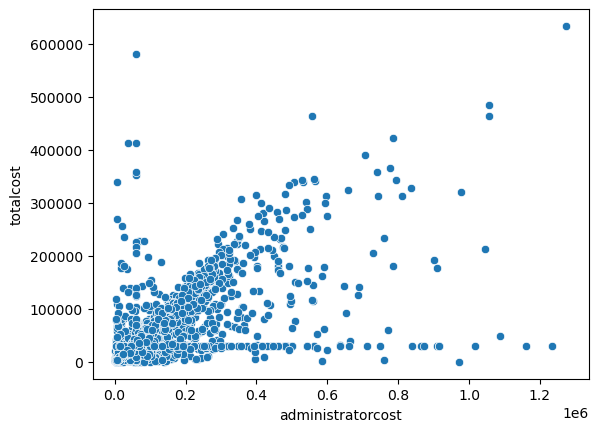

In [34]:
sns.scatterplot(x='administratorcost', y='totalcost', data=df)
plt.show()

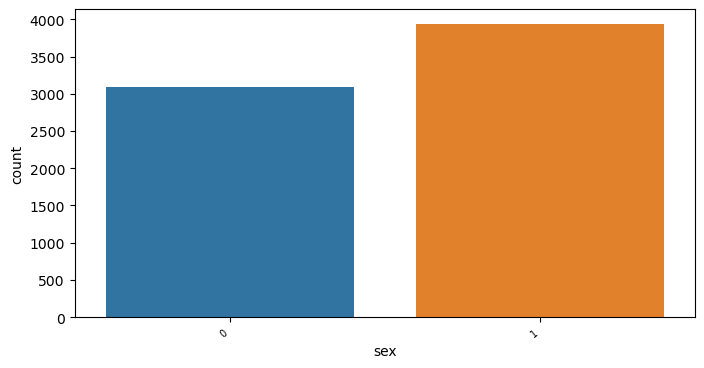

In [35]:
plt.rcParams["figure.figsize"] = (8, 4)
plt.rcParams["xtick.labelsize"] = 7
ax = sns.countplot(x = 'sex', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

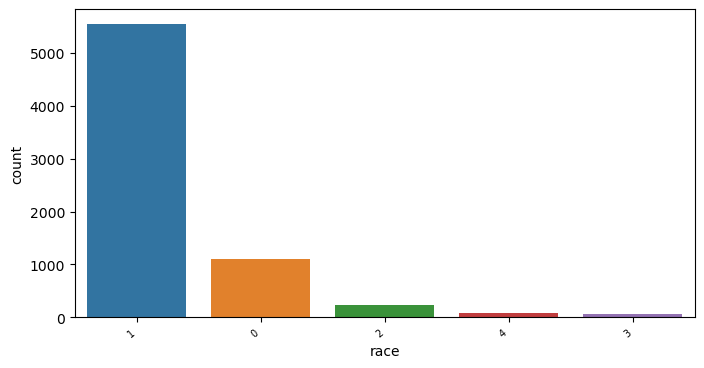

In [36]:
plt.rcParams["figure.figsize"] = (8, 4)
plt.rcParams["xtick.labelsize"] = 7
ax = sns.countplot(x = 'race', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

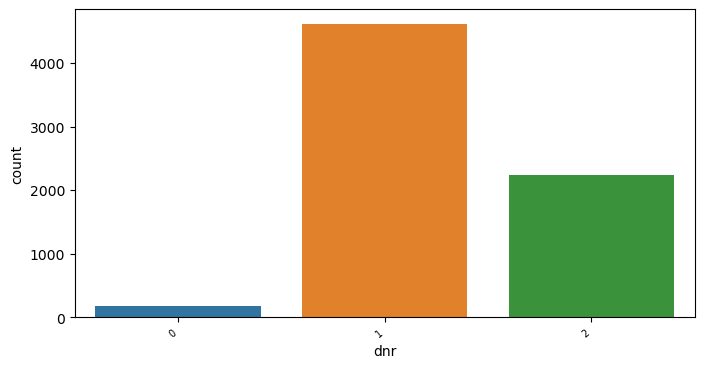

In [37]:
plt.rcParams["figure.figsize"] = (8, 4)
plt.rcParams["xtick.labelsize"] = 7
ax = sns.countplot(x = 'dnr', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

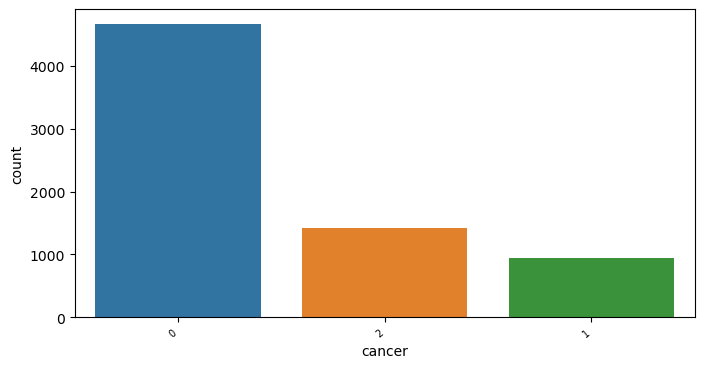

In [38]:
plt.rcParams["figure.figsize"] = (8, 4)
plt.rcParams["xtick.labelsize"] = 7
ax = sns.countplot(x = 'cancer', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

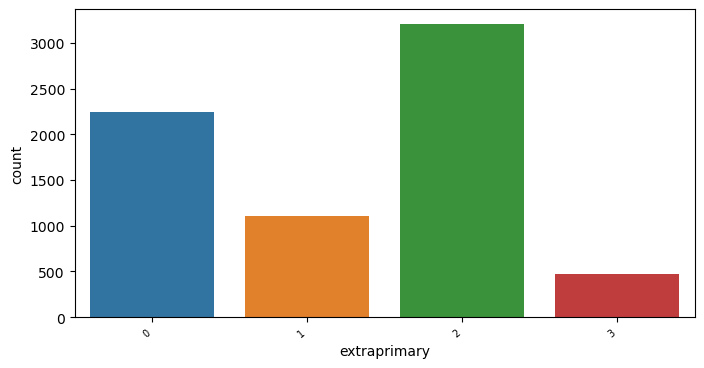

In [39]:
plt.rcParams["figure.figsize"] = (8, 4)
plt.rcParams["xtick.labelsize"] = 7
ax = sns.countplot(x = 'extraprimary', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

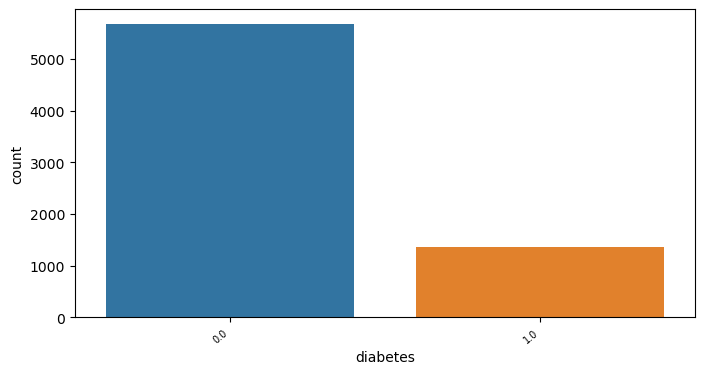

In [40]:
plt.rcParams["figure.figsize"] = (8, 4)
plt.rcParams["xtick.labelsize"] = 7
ax = sns.countplot(x = 'diabetes', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

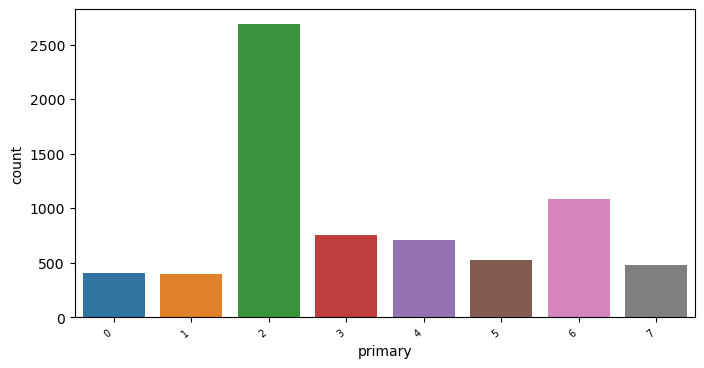

In [41]:
plt.rcParams["figure.figsize"] = (8, 4)
plt.rcParams["xtick.labelsize"] = 7
ax = sns.countplot(x = 'primary', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

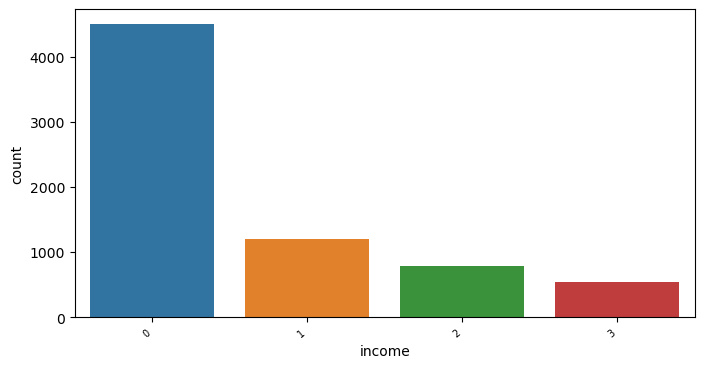

In [44]:
plt.rcParams["figure.figsize"] = (8, 4)
plt.rcParams["xtick.labelsize"] = 7
ax = sns.countplot(x = 'income', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

In [45]:
import pandas as pd
from itertools import combinations
from scipy.stats import chi2_contingency

def chi_square_association_test(df):

    categorical_columns = df.select_dtypes(include=['object']).columns  # Select categorical columns

    for col1, col2 in combinations(categorical_columns, 2):
        contingency_table = pd.crosstab(df[col1], df[col2])
        chi2, p, _, _ = chi2_contingency(contingency_table)

        print(f"Chi-Square Test for {col1} and {col2}:")
        print(f"Chi-Square Value: {chi2}")
        print(f"P-Value: {p}")

        alpha = 0.05  
        if p < alpha:
            print("There is a significant association between the columns.")
        else:
            print("There is no significant association between the columns.")
        print("\n")


chi_square_association_test(df)


Chi-Square Test for race and dnr:
Chi-Square Value: 32.21146297027376
P-Value: 8.53581802138527e-05
There is a significant association between the columns.


Chi-Square Test for race and primary:
Chi-Square Value: 108.42247244522575
P-Value: 2.0950403211743395e-11
There is a significant association between the columns.


Chi-Square Test for race and extraprimary:
Chi-Square Value: 57.048425194173696
P-Value: 7.746686005791098e-08
There is a significant association between the columns.


Chi-Square Test for race and cancer:
Chi-Square Value: 41.6044940750675
P-Value: 1.6064493861469621e-06
There is a significant association between the columns.


Chi-Square Test for dnr and primary:
Chi-Square Value: 569.7793599665907
P-Value: 1.4253543823285652e-112
There is a significant association between the columns.


Chi-Square Test for dnr and extraprimary:
Chi-Square Value: 334.9083369125814
P-Value: 2.676255056103068e-69
There is a significant association between the columns.


Chi-Square Test